In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [37]:
data = pd.read_csv("Prediction of Mental Health Among University Students.csv")

In [38]:
data.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [39]:
data=data.drop(['ReasonsForLack'], axis=1)

In [40]:
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1


**Scatter plot matrix**

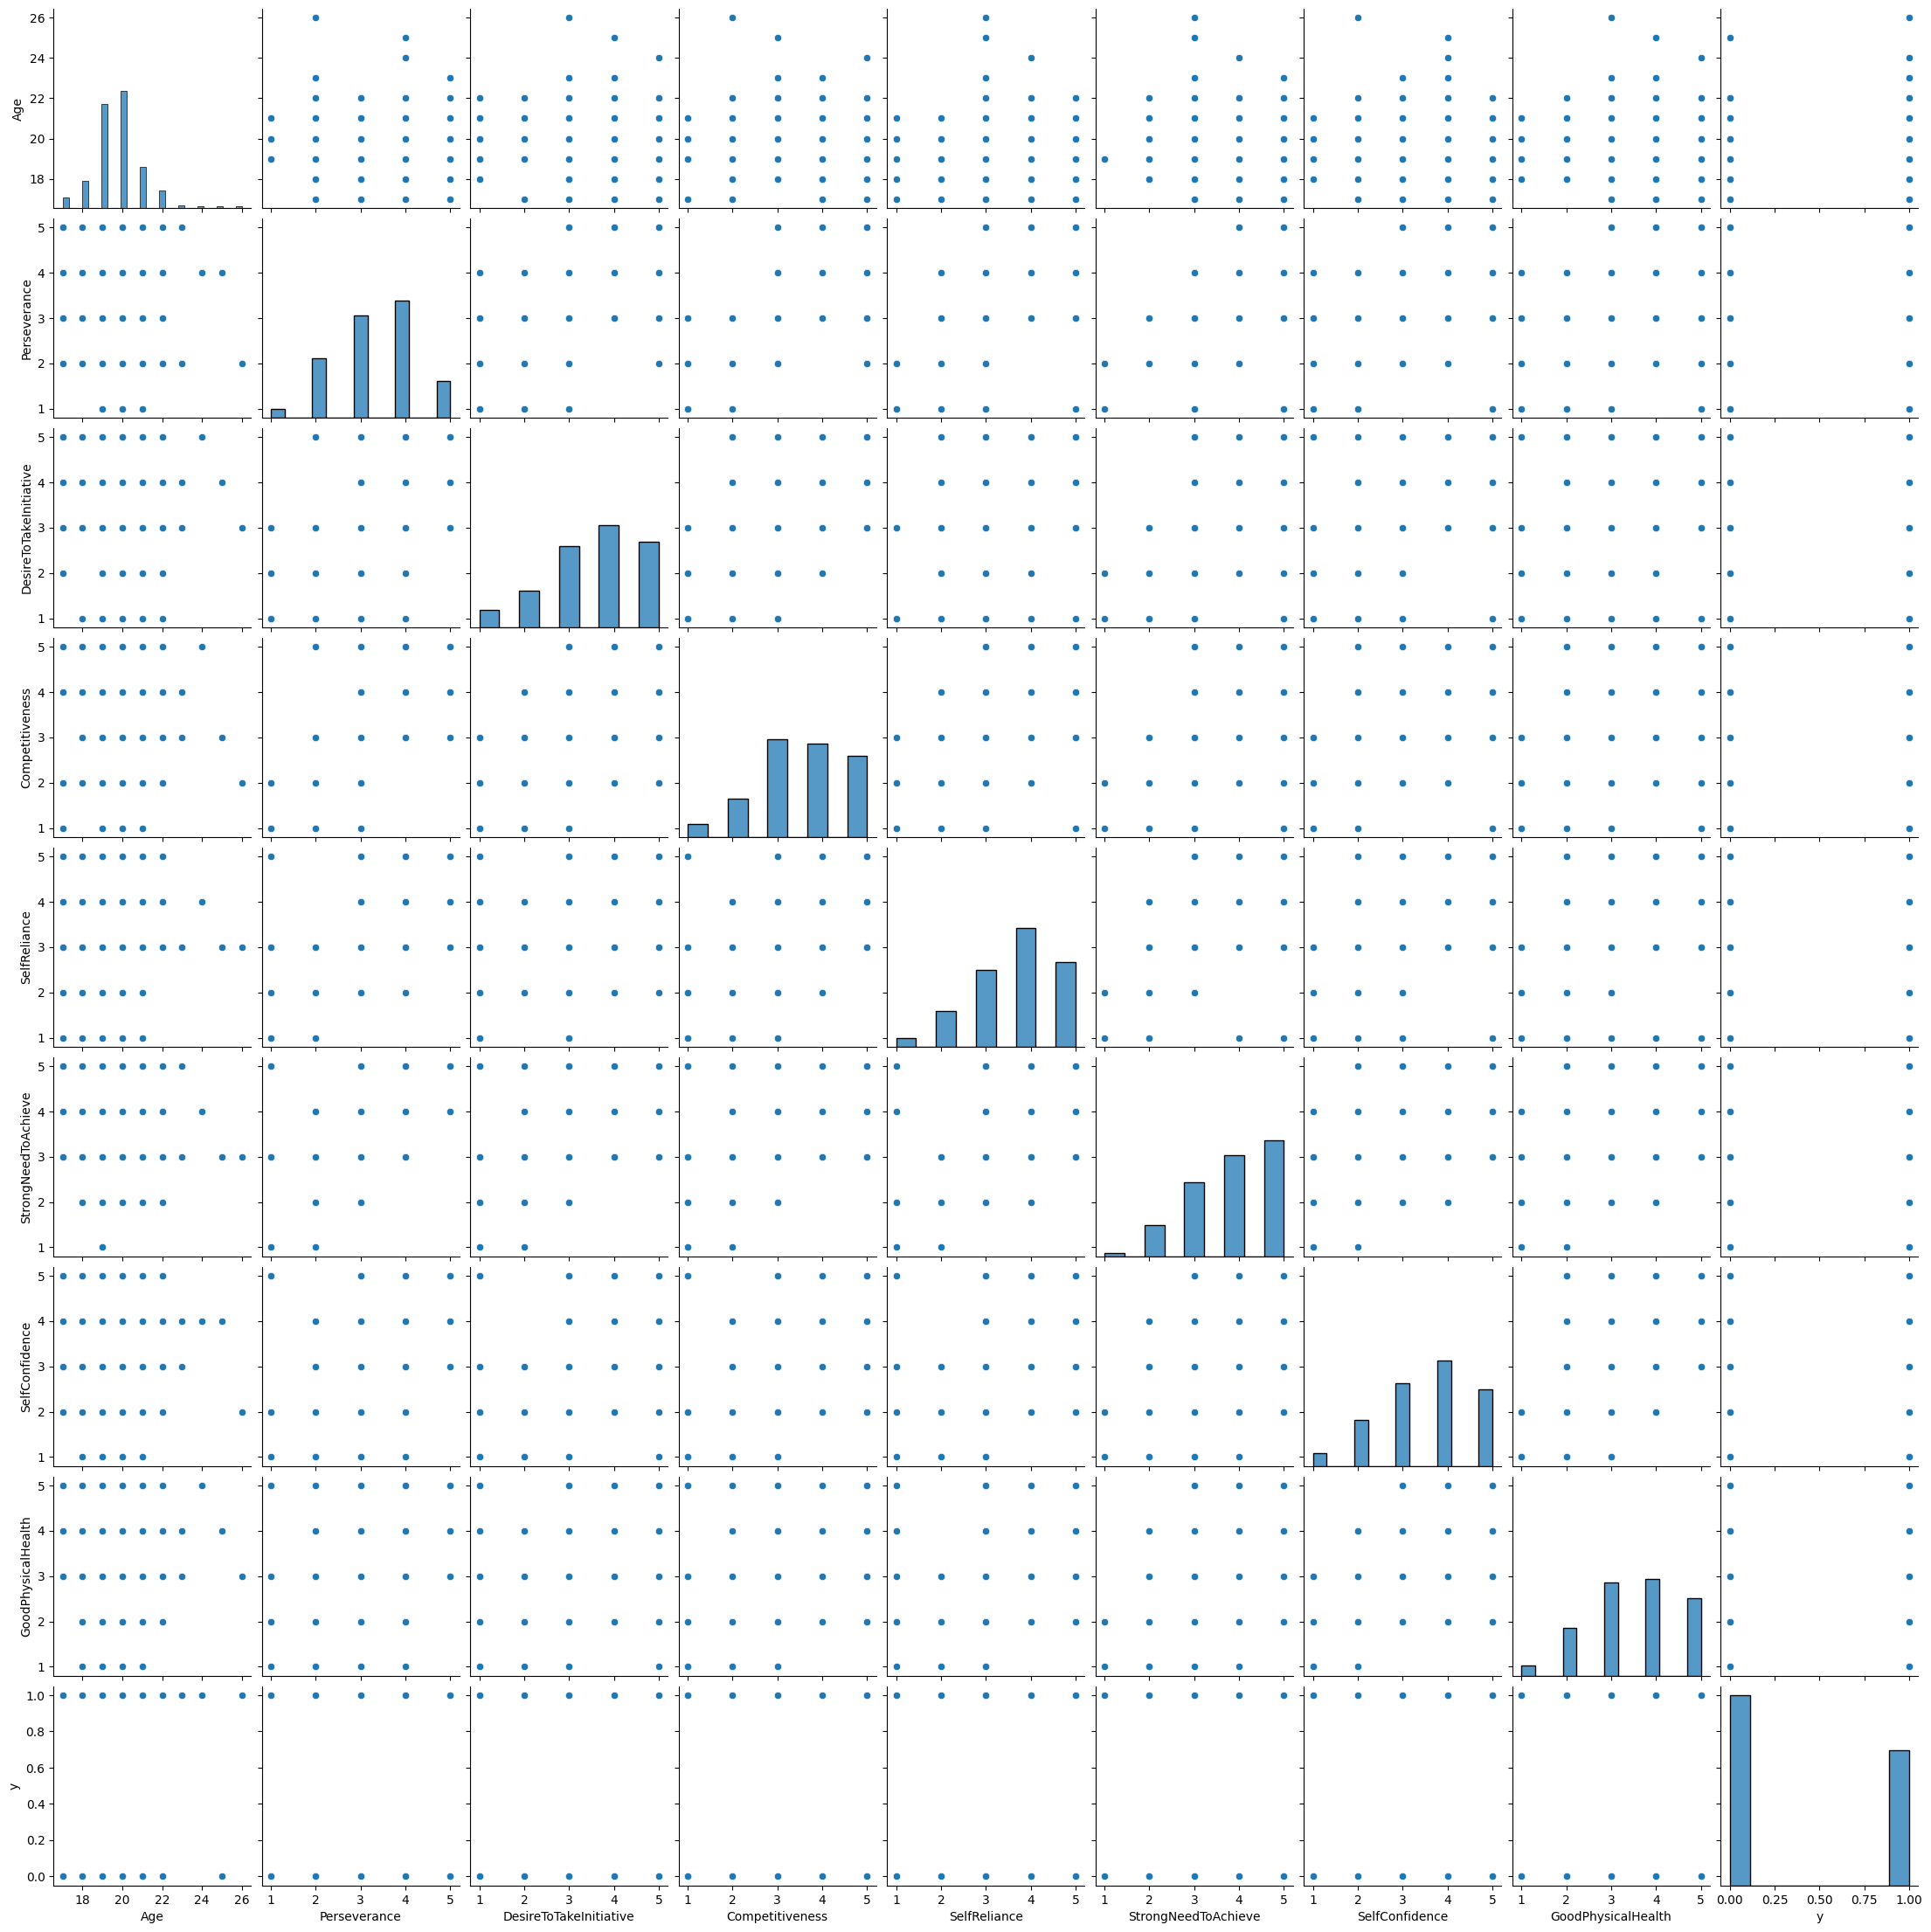

In [41]:
sns.pairplot(data)

In [42]:
from sklearn.preprocessing import LabelEncoder
# Fit and transform the categorical feature
data['EducationSector'] = LabelEncoder().fit_transform(data['EducationSector'])
data['IndividualProject'] = LabelEncoder().fit_transform(data['IndividualProject'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['City'] = LabelEncoder().fit_transform(data['City'])
data['Influenced'] = LabelEncoder().fit_transform(data['Influenced'])
data['MentalDisorder'] = LabelEncoder().fit_transform(data['MentalDisorder'])
data['KeyTraits'] = LabelEncoder().fit_transform(data['KeyTraits'])

**Correlation matrix plot**

<Axes: >

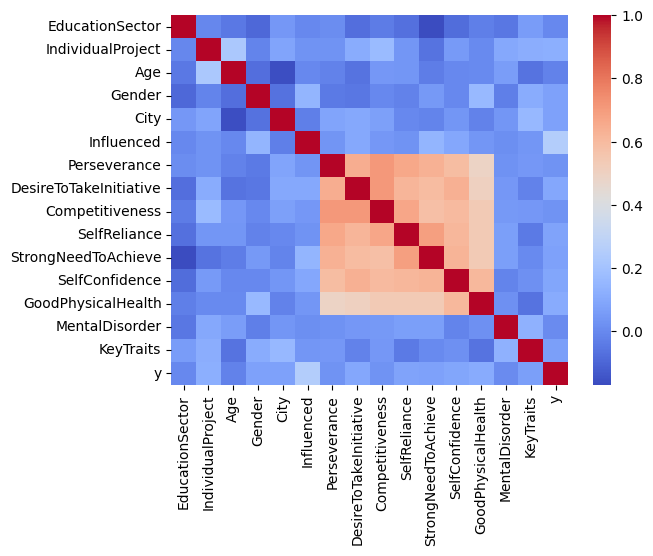

In [43]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

In [44]:
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,2,0,19,1,1,0,2,2,3,3,2,2,3,1,0,1
1,2,1,22,1,0,1,3,3,3,4,4,3,4,1,3,0
2,2,0,18,1,1,0,3,4,3,3,3,4,4,0,0,0
3,2,1,20,1,1,1,3,3,3,3,4,3,3,0,2,0
4,2,1,19,1,1,1,2,3,3,3,4,3,2,1,3,1


In [45]:
Y= data.iloc[:,15].values
X = data.iloc[:,0:14].values

In [46]:
X

array([[ 2,  0, 19, ...,  2,  3,  1],
       [ 2,  1, 22, ...,  3,  4,  1],
       [ 2,  0, 18, ...,  4,  4,  0],
       ...,
       [ 2,  1, 22, ...,  4,  3,  0],
       [ 2,  0, 19, ...,  2,  2,  0],
       [ 2,  1, 18, ...,  5,  2,  0]], dtype=int64)

In [47]:
Y

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [48]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
dt = DecisionTreeClassifier()

# Fitting the classifier to the training data
dt.fit(X_train, y_train)

# Predicting on the testing data
y_pred = dt.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.61      0.60        41
           1       0.33      0.32      0.33        25

    accuracy                           0.50        66
   macro avg       0.46      0.46      0.46        66
weighted avg       0.50      0.50      0.50        66



In [49]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
sv = SVC()

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        41
           1       0.00      0.00      0.00        25

    accuracy                           0.62        66
   macro avg       0.31      0.50      0.38        66
weighted avg       0.39      0.62      0.48        66



In [50]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
sv = RandomForestClassifier()

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.78      0.71        41
           1       0.47      0.32      0.38        25

    accuracy                           0.61        66
   macro avg       0.56      0.55      0.55        66
weighted avg       0.58      0.61      0.59        66



In [51]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
kn = KNeighborsClassifier()

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.68      0.64        41
           1       0.35      0.28      0.31        25

    accuracy                           0.53        66
   macro avg       0.48      0.48      0.48        66
weighted avg       0.51      0.53      0.52        66



In [52]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
kn = KNeighborsClassifier()

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        41
           1       0.40      0.32      0.36        25

    accuracy                           0.56        66
   macro avg       0.52      0.51      0.51        66
weighted avg       0.54      0.56      0.55        66



In [53]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
lrg = LinearRegression()

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66        41
           1       0.37      0.28      0.32        25

    accuracy                           0.55        66
   macro avg       0.49      0.49      0.49        66
weighted avg       0.52      0.55      0.53        66



In [54]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
lrg = LogisticRegression()

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        41
           1       0.35      0.28      0.31        25

    accuracy                           0.53        66
   macro avg       0.48      0.48      0.48        66
weighted avg       0.51      0.53      0.52        66



In [55]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
lasso = linear_model.Lasso(alpha=0.1)

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.70        41
           1       0.47      0.36      0.41        25

    accuracy                           0.61        66
   macro avg       0.57      0.56      0.56        66
weighted avg       0.59      0.61      0.59        66



In [56]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
rg = linear_model.Ridge(alpha=0.1)

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        41
           1       0.35      0.28      0.31        25

    accuracy                           0.53        66
   macro avg       0.48      0.48      0.48        66
weighted avg       0.51      0.53      0.52        66



In [57]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
qg = QuantileRegressor

# Fitting the classifier to the training data
sv.fit(X_train, y_train)

# Predicting on the testing data
y_pred = sv.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66        41
           1       0.37      0.28      0.32        25

    accuracy                           0.55        66
   macro avg       0.49      0.49      0.49        66
weighted avg       0.52      0.55      0.53        66



In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train and evaluate a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)
print(f'Linear Regression RMSE: {lr_rmse:.4f}')

# Train and evaluate a Lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_rmse = mean_squared_error(y_test, lasso.predict(X_test), squared=False)
print(f'Lasso Regression RMSE: {lasso_rmse:.4f}')

# Train and evaluate a Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_rmse = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
print(f'Ridge Regression RMSE: {ridge_rmse:.4f}')

# Train and evaluate an ElasticNet regression model
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
elasticnet_rmse = mean_squared_error(y_test, elasticnet.predict(X_test), squared=False)
print(f'ElasticNet Regression RMSE: {elasticnet_rmse:.4f}')

# Train and evaluate a decision tree regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_rmse = mean_squared_error(y_test, dt.predict(X_test), squared=False)
print(f'Decision Tree Regression RMSE: {dt_rmse:.4f}')

# Train and evaluate a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
print(f'Random Forest Regression RMSE: {rf_rmse:.4f}')

# Train and evaluate a gradient boosting regression model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_rmse = mean_squared_error(y_test, gb.predict(X_test), squared=False)
print(f'Gradient Boosting Regression RMSE: {gb_rmse:.4f}')

# Train and evaluate a support vector regression model
svm = SVR()
svm.fit(X_train, y_train)
svm_rmse = mean_squared_error(y_test, svm.predict(X_test), squared=False)
print(f'Support Vector Regression RMSE: {svm_rmse:.4f}')

# Train and evaluate a k-nearest neighbors regression model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_rmse = mean_squared_error(y_test, knn.predict(X_test), squared=False)
print(f'k-Nearest Neighbors Regression RMSE: {knn_rmse:.4f}')

Linear Regression RMSE: 0.5313
Lasso Regression RMSE: 0.4879
Ridge Regression RMSE: 0.5287
ElasticNet Regression RMSE: 0.4879
Decision Tree Regression RMSE: 0.6742
Random Forest Regression RMSE: 0.5478
Gradient Boosting Regression RMSE: 0.5345
Support Vector Regression RMSE: 0.5310
k-Nearest Neighbors Regression RMSE: 0.5416


In [59]:
X=data.drop("y", axis=1)

In [60]:
X

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits
0,2,0,19,1,1,0,2,2,3,3,2,2,3,1,0
1,2,1,22,1,0,1,3,3,3,4,4,3,4,1,3
2,2,0,18,1,1,0,3,4,3,3,3,4,4,0,0
3,2,1,20,1,1,1,3,3,3,3,4,3,3,0,2
4,2,1,19,1,1,1,2,3,3,3,4,3,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2,1,19,1,1,1,4,5,4,3,4,4,5,1,1
215,2,1,19,1,1,0,2,2,2,2,2,2,2,0,4
216,2,1,22,0,1,1,3,4,4,3,4,4,3,0,3
217,2,0,19,1,1,0,1,2,2,3,3,2,2,0,0


In [61]:
Y = data["y"]

In [62]:
Y

0      1
1      0
2      0
3      0
4      1
      ..
214    1
215    0
216    1
217    0
218    1
Name: y, Length: 219, dtype: int64

**Recursive Feature Elimination**

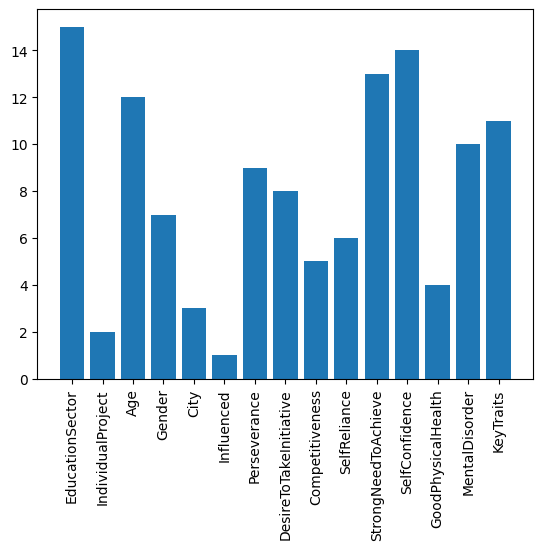

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, Y)
rankings = rfe.ranking_
features = pd.DataFrame(X).columns
plt.bar(features, rankings)
plt.xticks(rotation=90)
plt.show()


In [64]:
X=X.drop("IndividualProject",axis=1)
X=X.drop("City",axis=1)
X=X.drop("Influenced",axis=1)
X=X.drop("GoodPhysicalHealth",axis=1)

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train and evaluate a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)
print(f'Linear Regression RMSE: {lr_rmse:.4f}')
# Train and evaluate a Lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_rmse = mean_squared_error(y_test, lasso.predict(X_test), squared=False)
print(f'Lasso Regression RMSE: {lasso_rmse:.4f}')

# Train and evaluate a Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_rmse = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
print(f'Ridge Regression RMSE: {ridge_rmse:.4f}')

# Train and evaluate an ElasticNet regression model
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
elasticnet_rmse = mean_squared_error(y_test, elasticnet.predict(X_test), squared=False)
print(f'ElasticNet Regression RMSE: {elasticnet_rmse:.4f}')

# Train and evaluate a decision tree regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_rmse = mean_squared_error(y_test, dt.predict(X_test), squared=False)
print(f'Decision Tree Regression RMSE: {dt_rmse:.4f}')

# Train and evaluate a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
print(f'Random Forest Regression RMSE: {rf_rmse:.4f}')

# Train and evaluate a gradient boosting regression model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_rmse = mean_squared_error(y_test, gb.predict(X_test), squared=False)
print(f'Gradient Boosting Regression RMSE: {gb_rmse:.4f}')

# Train and evaluate a support vector regression model
svm = SVR()
svm.fit(X_train, y_train)
svm_rmse = mean_squared_error(y_test, svm.predict(X_test), squared=False)
print(f'Support Vector Regression RMSE: {svm_rmse:.4f}')

# Train and evaluate a k-nearest neighbors regression model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_rmse = mean_squared_error(y_test, knn.predict(X_test), squared=False)
print(f'k-Nearest Neighbors Regression RMSE: {knn_rmse:.4f}')

Linear Regression RMSE: 0.5246
Lasso Regression RMSE: 0.4879
Ridge Regression RMSE: 0.5238
ElasticNet Regression RMSE: 0.4879
Decision Tree Regression RMSE: 0.7882
Random Forest Regression RMSE: 0.5484
Gradient Boosting Regression RMSE: 0.5583
Support Vector Regression RMSE: 0.5518
k-Nearest Neighbors Regression RMSE: 0.5543


**"So after feature selection we can see the RMSE error is reduced. Gives better accuracy."**